In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/survey_results_public.csv")

In [2]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]

In [4]:
df = df.rename({"ConvertedCompYearly": "AnnualSalary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,AnnualSalary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   YearsCodePro  66136 non-null  object 
 3   Employment    87898 non-null  object 
 4   AnnualSalary  48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [6]:
df = df[df["AnnualSalary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,AnnualSalary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   AnnualSalary  48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [8]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
AnnualSalary    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   AnnualSalary  47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [10]:
df["Country"].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

In [11]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.head()

,Country,EdLevel,YearsCodePro,AnnualSalary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [12]:
def shorten_categories(category, cutoff):
    category_map = {}
    for i in range(len(category)):
        if category.values[i] >= cutoff:
            category_map[category.index[i]] = category.index[i]
        else:
            category_map[category.index[i]] = "Other"
    return category_map

In [13]:
country_map = shorten_categories(df["Country"].value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


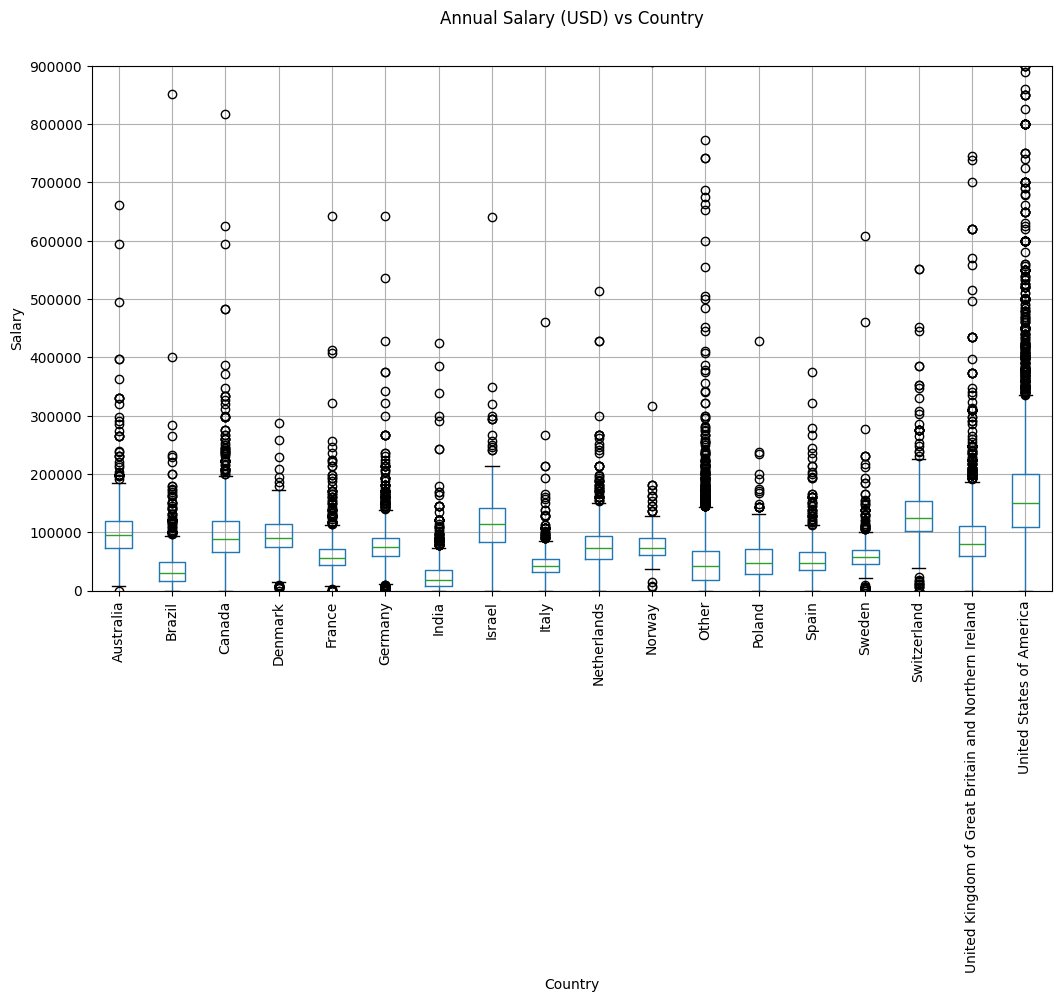

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot("AnnualSalary", "Country", ax=ax)
plt.suptitle("Annual Salary (USD) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.ylim((0, 900000))
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df["AnnualSalary"] <= 350000]
df = df[df["AnnualSalary"] >= 10000]

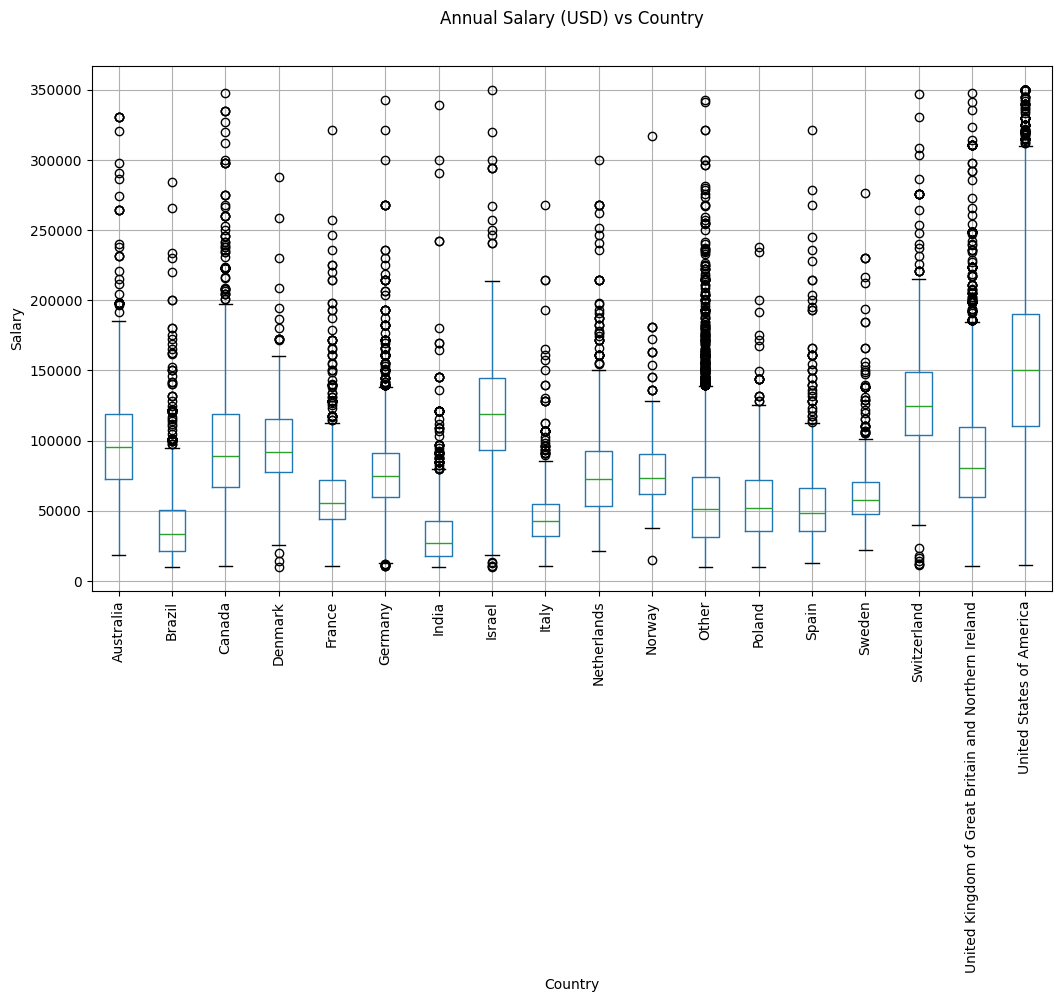

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot("AnnualSalary", "Country", ax=ax)
plt.suptitle("Annual Salary (USD) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [17]:
df["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', '15', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '25',
       '12', '20', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

In [18]:
def clean_experience(year):
    if year == "More than 50 years":
        return 50
    if year == "Less than 1 year":
        return 0.5
    return int(year)

In [19]:
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [20]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [21]:
def clean_education(level):
    if "Bachelor" in level:
        return "Bachelor's degree"
    if "Master" in level:
        return "Master's degree"
    if "Professional degree" in level:
        return "Post grad"
    return "Less than a bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [22]:
df["EdLevel"].unique()

array(["Bachelor's degree", 'Less than a bachelors', "Master's degree",
       'Post grad'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36159 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       36159 non-null  object 
 1   EdLevel       36159 non-null  object 
 2   YearsCodePro  36159 non-null  float64
 3   AnnualSalary  36159 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [25]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([17, 16, 11,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10,  3,  7,
       12])

In [26]:
X = df.drop("AnnualSalary", axis=1)
y = df["AnnualSalary"]

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
# Fit the model using the training data
linear_reg.fit(X, y.values)

LinearRegression()

In [28]:
y_pred = linear_reg.predict(X)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))
error

53217.856474237204

In [30]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
# Fit the model with data and parameters
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [31]:
y_pred = dec_tree_reg.predict(X)

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$39,442.57


In [33]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
# Fit the model with data
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [34]:
y_pred = random_forest_reg.predict(X)

In [35]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$39,501.83


In [39]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [40]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

40,302.30


In [41]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open("saved_steps.pkl", "wb") as file:
    pickle.dump(data, file)